## K-Means
##### El método de K-medias es una técnica de segmentación que se utiliza para clasificar los píxeles de una imagen en diferentes grupos o "clases" en función de sus colores. En este proceso, el algoritmo agrupa píxeles similares en color o intensidad en un número específico de categorías (o "clusters") definidas por el usuario. 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer la imagen en color
imagen_rgb = cv2.imread('lanus.png')

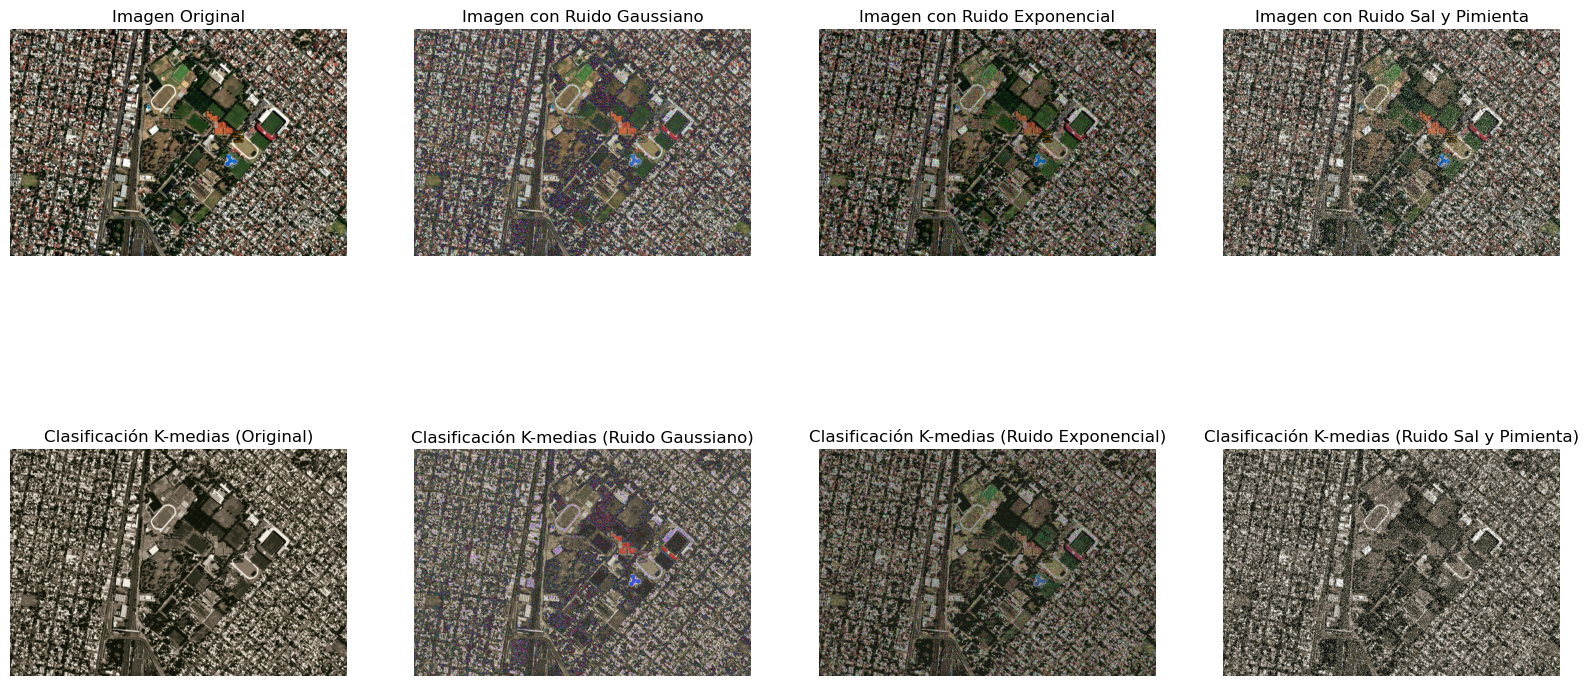

In [5]:
# Agregar ruido Gaussiano aditivo
def add_gaussian_noise(image, mean, stddev, contamination_percentage):
    # Genera ruido gaussiano
    gaussian_noise = np.random.normal(mean, stddev, image.shape)

    # Calcula la máscara de contaminación
    mask = np.random.rand(*image.shape) < (contamination_percentage / 100)

    # Agrega el ruido a la imagen solo en los puntos especificados por la máscara
    noisy_image = np.copy(image)
    noisy_image[mask] = image[mask] + gaussian_noise[mask]

    # Asegura que los valores se mantengan en el rango [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    return noisy_image

# Función para agregar ruido exponencial multiplicativo
def add_exponential_noise(image, scale, contamination_percentage):
    # Genera ruido exponencial
    exponential_noise = np.random.exponential(scale, image.shape)

    # Calcula la máscara de contaminación
    mask = np.random.rand(*image.shape) < (contamination_percentage / 100)

    # Agrega el ruido a la imagen solo en los puntos especificados por la máscara
    noisy_image = np.copy(image)
    noisy_image[mask] = image[mask] * exponential_noise[mask]

    # Asegura que los valores se mantengan en el rango [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    return noisy_image

# Agregar ruido sal y pimienta
def agregar_ruido_sal_pimienta(imagen, prob=0.1):
    imagen_ruido = np.copy(imagen)
    num_salt = int(np.ceil(prob * imagen.size * 0.5))
    num_pepper = int(np.ceil(prob * imagen.size * 0.5))

    # Coordenadas de sal
    salt_coords = (np.random.randint(0, imagen.shape[0], num_salt),
                   np.random.randint(0, imagen.shape[1], num_salt))
    imagen_ruido[salt_coords] = [255, 255, 255]

    # Coordenadas de pimienta
    pepper_coords = (np.random.randint(0, imagen.shape[0], num_pepper),
                     np.random.randint(0, imagen.shape[1], num_pepper))
    imagen_ruido[pepper_coords] = [0, 0, 0]

    return imagen_ruido

# Clasificar imagen usando K-medias
def kmeans_classification(image, k=8):
    # Convertir imagen en una lista de píxeles
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Definir criterios y aplicar K-medias
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convertir centros a enteros y reconstruir la imagen segmentada
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)

    return segmented_image

# Generar imágenes contaminadas
imagen_ruido_gaussiano = add_gaussian_noise(imagen_rgb, 0, 25, 70)
imagen_ruido_exponencial = add_exponential_noise(imagen_rgb, 1.0, 50)
imagen_ruido_sal_pimienta = agregar_ruido_sal_pimienta(imagen_rgb)

# Aplicar K-medias a cada imagen (original y versiones contaminadas)
segmented_original = kmeans_classification(imagen_rgb, k=8)
segmented_gaussian = kmeans_classification(imagen_ruido_gaussiano, k=8)
segmented_exponential = kmeans_classification(imagen_ruido_exponencial, k=8)
segmented_salt_pepper = kmeans_classification(imagen_ruido_sal_pimienta, k=8)

# Visualizar los resultados
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Imágenes originales y contaminadas
axes[0, 0].imshow(cv2.cvtColor(imagen_rgb, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Imagen Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(cv2.cvtColor(imagen_ruido_gaussiano, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Imagen con Ruido Gaussiano')
axes[0, 1].axis('off')

axes[0, 2].imshow(cv2.cvtColor(imagen_ruido_exponencial, cv2.COLOR_BGR2RGB))
axes[0, 2].set_title('Imagen con Ruido Exponencial')
axes[0, 2].axis('off')

axes[0, 3].imshow(cv2.cvtColor(imagen_ruido_sal_pimienta, cv2.COLOR_BGR2RGB))
axes[0, 3].set_title('Imagen con Ruido Sal y Pimienta')
axes[0, 3].axis('off')

# Resultados de K-medias
axes[1, 0].imshow(cv2.cvtColor(segmented_original, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Clasificación K-medias (Original)')
axes[1, 0].axis('off')

axes[1, 1].imshow(cv2.cvtColor(segmented_gaussian, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Clasificación K-medias (Ruido Gaussiano)')
axes[1, 1].axis('off')

axes[1, 2].imshow(cv2.cvtColor(segmented_exponential, cv2.COLOR_BGR2RGB))
axes[1, 2].set_title('Clasificación K-medias (Ruido Exponencial)')
axes[1, 2].axis('off')

axes[1, 3].imshow(cv2.cvtColor(segmented_salt_pepper, cv2.COLOR_BGR2RGB))
axes[1, 3].set_title('Clasificación K-medias (Ruido Sal y Pimienta)')
axes[1, 3].axis('off')

plt.show()


### Conclusiones
##### **Imagen Original**: La segmentación de K-medias  parece dividir las diferentes áreas  de manera efectiva. La clasificación es relativamente clara y las transiciones entre áreas segmentadas se ven bien logradas, lo cual es adecuado para aplicaciones de segmentación.
##### **Imagen con Ruido Gaussiano**: En este caso, la segmentación parece haberse realizado de manera precisa tambien, detectando las limitaciones entre las vegetaciones y los edificios. Aun así, se pueden notar algunas variaciones en las áreas segmentadas, especialmente en las áreas con menor contraste.
##### **Imagen con Ruido Exponencial**: La clasificación en la imagen con ruido exponencial muestra una segmentación menos precisa debido a las variaciones en la intensidad causadas por el ruido. Esto genera una mayor cantidad de áreas con tonalidades inusuales, afectando la coherencia en la segmentación.
##### **Imagen con Ruido Sal y Pimienta**: El ruido de sal y pimienta afecta de forma significativa la segmentación de K-medias. Este tipo de ruido introduce puntos de alto contraste que el algoritmo interpreta como nuevas clases, lo cual afecta la coherencia en la clasificación.
